## 1. Introduction to Memecoins:

Memecoins are a unique category of cryptocurrencies that are often created as a joke or based on internet memes. They typically don’t have a serious use case or technological innovation behind them, but they often gain popularity due to viral internet trends, celebrity endorsements, or active communities. While some memecoins are created purely for fun, others can achieve significant market value, attracting investors and enthusiasts looking for short-term gains or novelty.

Memecoins have gained popularity for several reasons, primarily due to the influence of community-driven efforts and social media. Internet culture, including viral content and memes, plays a significant role in their rise. Platforms like Twitter, Reddit, and Discord have become key spaces where users promote their favorite memecoins, often relying on humor and collective enthusiasm to generate excitement. These communities are highly engaged and help maintain momentum by sharing memes, creating buzz, and encouraging others to get involved, often without the backing of traditional marketing efforts. Additionally, celebrity endorsements and media coverage have amplified the popularity of memecoins. High-profile figures like Elon Musk, with his frequent tweets about Dogecoin, have caused significant price surges and drawn mainstream attention. As a result, memecoins like Dogecoin and Shiba Inu often find themselves in the media spotlight, attracting new investors. Furthermore, the speculative nature of memecoins has made them highly appealing to traders looking for quick profits. Their volatility offers opportunities for short-term gains, while their low entry costs make them accessible to a broader audience, including those new to cryptocurrency. This combination of community engagement, celebrity endorsements, and speculative interest has contributed to the meteoric rise of memecoins in the cryptocurrency market.

## 2. Data Collection & Preprocessing:

In [15]:
!pip install requests
!pip install tweepy
!pip install tweepy --upgrade

***Collect Data***

In [1]:
import requests
import tweepy
import pandas as pd
import datetime

In [45]:
! pip install pycoingecko

In [17]:
# Define the API URL for Bitcoin price in USD
url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd'

# Send the GET request to the API
response = requests.get(url)

# Check if the response was successful (status code 200)
if response.status_code == 200:
    # Parse the response as JSON
    data = response.json()
    # Extract Bitcoin price
    bitcoin_price = data['bitcoin']['usd']
    print(f"Bitcoin price in USD: ${bitcoin_price}")
else:
    print("Failed to fetch data from CoinGecko API")


Bitcoin price in USD: $91316


In [62]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import datetime

cg = CoinGeckoAPI()
currency = 'usd'
days = '30'
coin_ids = ['dogecoin', 'shiba-inu']
dfs = {}  # Dictionary to store DataFrames

for coin_id in coin_ids:
    historical_data = cg.get_coin_market_chart_by_id(id=coin_id, vs_currency=currency, days=days)
    coin_details = cg.get_coin_by_id(id=coin_id)
    market_data = coin_details.get('market_data', {})

    if 'prices' in historical_data and coin_details:
        prices_list = historical_data['prices']
        df = pd.DataFrame(prices_list, columns=['Timestamp_ms', 'Price_USD'])
        df['Timestamp'] = df['Timestamp_ms'].apply(lambda ms: datetime.datetime.fromtimestamp(ms / 1000))
        df.set_index('Timestamp', inplace=True)
        df.drop(columns=['Timestamp_ms'], inplace=True)

        # Add more attributes from coin_details and historical data
        df['Symbol'] = coin_details.get('symbol', '').upper()
        df['Name'] = coin_details.get('name', '')
        df['Market_Cap_USD'] = [item[1] for item in historical_data.get('market_caps', [])]
        df['Total_Volume_USD'] = [item[1] for item in historical_data.get('total_volumes', [])]
        df['Market_Cap_Rank'] = coin_details.get('market_cap_rank')
        df['Total_Supply'] = coin_details.get('total_supply')
        df['Circulating_Supply'] = coin_details.get('circulating_supply')
        df['All_Time_High_USD'] = market_data.get('ath', {}).get('usd')
        df['All_Time_High_Date'] = market_data.get('ath_date', {}).get('usd')
        df['Price_Change_24h'] = market_data.get('price_change_24h')
        df['Price_Change_Percentage_24h'] = market_data.get('price_change_percentage_24h')
        df['Market_Cap_Change_24h'] = market_data.get('market_cap_change_24h')
        df['Market_Cap_Change_Percentage_24h'] = market_data.get('market_cap_change_percentage_24h')

        dfs[coin_id] = df
        print(f"\n{coin_details['name']} Historical Data with Added Attributes (Head):")
        print(dfs[coin_id].head())
    else:
        print(f"Error fetching historical data or details for {coin_id}.")
        print(historical_data)
        print(coin_details)

# You can now access the DataFrames using the dfs dictionary, e.g., dfs['dogecoin'] and dfs['shiba-inu']


Dogecoin Historical Data with Added Attributes (Head):
                         Price_USD Symbol      Name  Market_Cap_USD  \
Timestamp                                                             
2025-03-24 04:04:57.223   0.171093   DOGE  Dogecoin    2.541479e+10   
2025-03-24 05:04:49.307   0.170753   DOGE  Dogecoin    2.537969e+10   
2025-03-24 06:04:46.835   0.171215   DOGE  Dogecoin    2.537855e+10   
2025-03-24 07:04:48.788   0.171129   DOGE  Dogecoin    2.540920e+10   
2025-03-24 08:05:59.243   0.172725   DOGE  Dogecoin    2.564956e+10   

                         Total_Volume_USD  Market_Cap_Rank Total_Supply  \
Timestamp                                                                 
2025-03-24 04:04:57.223      5.554872e+08                8         None   
2025-03-24 05:04:49.307      5.276828e+08                8         None   
2025-03-24 06:04:46.835      5.282496e+08                8         None   
2025-03-24 07:04:48.788      5.762943e+08                8         None

In [64]:
for coin, df in dfs.items():
    csv_filename = f"{coin}_data.csv"
    df.to_csv(csv_filename)
    print(f"\nDataFrame for {coin} has been exported to '{csv_filename}'")


DataFrame for dogecoin has been exported to 'dogecoin_data.csv'

DataFrame for shiba-inu has been exported to 'shiba-inu_data.csv'


Name: pycoingecko
Version: 3.2.0
Summary: Python wrapper around the CoinGecko API
Home-page: https://github.com/man-c/pycoingecko
Author: Christoforou Manolis
Author-email: emchristoforou@gmail.com
License: MIT
Location: C:\Users\den51\anaconda3\envs\wif3009\Lib\site-packages
Requires: requests
Required-by: 


***Sentiment Analysis***

In [36]:
from requests_oauthlib import OAuth1Session

api_key = "OCoIfPLUPXQKesrPkV31i3fz6"
api_secret_key = "07DXQGk5qYqKzGGpXgpQ03FCjeBdmWRUJkXBXcvTo9UwjVoNxl"
access_token = "1472555310417997826-zsjpcTdhoJHECpqYaXIesAlzLPHkfA"
access_token_secret = "pUYwObQz5I46HNnImwBieBbOPq87QXkxUbyLdBN6sGZn2"

# Authenticate with the Twitter API
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

# Create an API object
api = tweepy.API(auth, wait_on_rate_limit=True)

# Fetch recent tweets mentioning Dogecoin using search_tweets
tweets = api.search_tweets(q="Dogecoin", count=100, lang="en", tweet_mode="extended")

for tweet in tweets:
    print(f"{tweet.user.screen_name}: {tweet.full_text}")

Forbidden: 403 Forbidden
453 - You currently have access to a subset of X API V2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.x.com/en/portal/product

In [2]:
import requests

bearer_token = "AAAAAAAAAAAAAAAAAAAAACcq0wEAAAAAQSrHQ5To5zsHkzgOBt7SCqid%2FiQ%3DnxYgdHiBz6A52jriTIpwdUTzTk3y2WIHy13xcu7uPBEpAT6dYX"  # Replace with your actual Bearer Token

headers = {
    "Authorization": f"Bearer {bearer_token}"
}

# Construct your search query
query = "Dogecoin"
url = f"https://api.twitter.com/2/tweets/search/recent?query={query}&tweet.fields=created_at,public_metrics"

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code} - {response.text}")

Error: 429 - {"account_id":1914742321192845312,"product_name":"standard-basic","title":"UsageCapExceeded","period":"Monthly","scope":"Product","detail":"Usage cap exceeded: Monthly product cap","type":"https://api.twitter.com/2/problems/usage-capped"}


In [41]:
!pip install nltk
!pip install emoji

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   --------------------------------------- 590.6/590.6 kB 10.6 MB/s eta 0:00:00


In [43]:
import re
import string
import emoji
from nltk.corpus import stopwords
import nltk  # Import the nltk module

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

def clean_tweet_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'^rt @\w+:', '', text).strip()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = emoji.demojize(text)
    text = re.sub(r':\w+:', '', text)
    word_tokens = text.split()
    filtered_words = [word for word in word_tokens if word not in stop_words]
    text = " ".join(filtered_words)
    return text

# Example usage with your API response:
if 'data' in response.json():
    for tweet in response.json()['data']:
        cleaned_text = clean_tweet_text(tweet['text'])
        print(f"Original: {tweet['text']}")
        print(f"Cleaned: {cleaned_text}")
        # Now you can apply your sentiment analysis on cleaned_text

Original: RT @dogetipping: DOGECOIN - The People's Currency https://t.co/XLjrTvXhUa
Cleaned: rt dogecoin peoples currency
Original: RT @realDogecoinOG: Let’s not forget who started this crypto crash. 🤣  Dogecoin https://t.co/GRI6XRu7jr
Cleaned: rt lets forget started crypto crash dogecoin
Original: RT @Peeiippeii: Hey @binance it’s time to list #peipei !
Great community with big momentum coming in! 

#Crypto #memecoin  #DeFi #Altcoins…
Cleaned: rt hey time list great community big momentum coming
Original: RT @Dogecoin_To61: Last post:

Everyone buy #dogecoin its the currency for everyone! 

#DogecoinRise #dogearmy #DogeToAdollar #dogecointo1d…
Cleaned: rt last post everyone buy currency everyone
Original: RT @what_is_depin: Is It Too Late To Buy Dogecoin? SUI And Lightchain AI Could Be Better Picks For Profits
https://t.co/hPOl4wH6qi https://…
Cleaned: rt late buy dogecoin sui lightchain ai could better picks profits
Original: @janborr71 @cb_doge I didn't claim @cb_doge's account is p

In [6]:
import requests
import os
import json
import datetime
import time

def search_tweets(bearer_token, query, max_results=100, next_token=None):
    headers = {"Authorization": f"Bearer {bearer_token}"}
    url = "https://api.twitter.com/2/tweets/search/recent"
    params = {
        "query": query,
        "max_results": max_results,
        "tweet.fields": "created_at,public_metrics"
    }
    if next_token:
        params["next_token"] = next_token
    response = requests.get(url, headers=headers, params=params)
    if response.status_code != 200:
        raise Exception(f"Request failed with status code {response.status_code}: {response.text}")
    return response.json()

bearer_token = "AAAAAAAAAAAAAAAAAAAAACcq0wEAAAAAQSrHQ5To5zsHkzgOBt7SCqid%2FiQ%3DnxYgdHiBz6A52jriTIpwdUTzTk3y2WIHy13xcu7uPBEpAT6dYX"
queries = ["Shiba Inu"]
all_tweets = []
for query in queries:
    print(f"Fetching tweets for: {query}")
    next_token = None
    for _ in range(5):  # Fetch multiple pages of results
        try:
            json_response = search_tweets(bearer_token, query, next_token=next_token)
            if 'data' in json_response:
                for tweet in json_response['data']:
                    all_tweets.append({
                        'platform': 'Twitter',
                        'query': query,
                        'created_at': datetime.datetime.strptime(tweet['created_at'], "%Y-%m-%dT%H:%M:%S.%fZ"),
                        'text': tweet['text'],
                        'retweet_count': tweet['public_metrics'].get('retweet_count', 0),
                        'reply_count': tweet['public_metrics'].get('reply_count', 0),
                        'like_count': tweet['public_metrics'].get('like_count', 0),
                        'quote_count': tweet['public_metrics'].get('quote_count', 0)
                    })
                next_token = json_response.get('meta', {}).get('next_token')
                if not next_token:
                    break
            else:
                print(f"No data found for query: {query}")
                break
            time.sleep(1)  # Be mindful of rate limits
        except Exception as e:
            print(f"Error fetching tweets for {query}: {e}")
            break

df_tweets = pd.DataFrame(all_tweets)
print("\nTwitter Data (Head):")
print(df_tweets.head())

Fetching tweets for: Shiba Inu
Error fetching tweets for Shiba Inu: Request failed with status code 429: {"account_id":1914742321192845312,"product_name":"standard-basic","title":"UsageCapExceeded","period":"Monthly","scope":"Product","detail":"Usage cap exceeded: Monthly product cap","type":"https://api.twitter.com/2/problems/usage-capped"}

Twitter Data (Head):
Empty DataFrame
Columns: []
Index: []


In [5]:
csv_filename = "twitter_data_shiba.csv"
df_tweets.to_csv(csv_filename)

**Reddit**

In [26]:
! pip install praw

In [1]:
import praw
import os
import webbrowser
import time

In [2]:
import praw

client_id = "1Z9QJVRYeyqdDPGmTfFuOg"  # Replace with your client_id
client_secret = "pKtQCeehtl8-LfNUgTO9llxZjXx5iw"  # Replace with your client_secret
username = "Successful_Cat_6509"  # Replace with your Reddit username
password = "D@H$Y_0100100"  # Replace with your Reddit password

reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     username=username,
                     password=password,
                     user_agent="MemecoinAnalysisScript/v0.1 (by /u/Successful_Cat_6509)")

# Now you can start interacting with the Reddit API using the 'reddit' object
# For example:
subreddit = reddit.subreddit("memecoins")
for submission in subreddit.hot(limit=5):
    print(submission.title)

OAuthException: invalid_grant error processing request

In [ ]:
!pip show praw

In [3]:
!pip install textblob

In [1]:
import praw
import os
import webbrowser
import time

# Replace with your actual app name and version
APP_NAME = "MemecoinAnalysisScript"
APP_VERSION = "v0.2"
REDDIT_USERNAME = "Successful_Cat_6509"  # Replace with your Reddit username

CLIENT_ID = "1Z9QJVRYeyqdDPGmTfFuOg"  # Replace with your client_id
CLIENT_SECRET = "pKtQCeehtl8-LfNUgTO9llxZjXx5iw"  # Replace with your client_secret
REDIRECT_URI = "http://localhost:8080"
USER_AGENT = f"{APP_NAME}/{APP_VERSION} (by /u/{REDDIT_USERNAME})"

# Initialize PRAW for the first time to get the authorization URL
reddit = praw.Reddit(client_id=CLIENT_ID,
                     client_secret=CLIENT_SECRET,
                     redirect_uri=REDIRECT_URI,
                     user_agent=USER_AGENT)

# Get the authorization URL
auth_url = reddit.auth.url(scope=["identity", "read", "submit"],
                          state="your_random_state")  # Add other scopes as needed

print(f"Open this URL in your browser to authorize the application:\n{auth_url}\n")

# You will be redirected to http://localhost:8080/?state=your_random_state&code=YOUR_AUTHORIZATION_CODE
# Copy the value of 'code' from the URL in your browser.
authorization_code = input("Enter the authorization code you received: ")

try:
    token_info = reddit.auth.authorize(authorization_code)
    print("\nAuthorization successful!")
    print("Access token:", token_info['access_token'])
    print("Refresh token:", token_info['refresh_token'])

    # Store the refresh token securely (e.g., in an environment variable or a file)
    os.environ['REDDIT_REFRESH_TOKEN'] = token_info['refresh_token']
    print("\nRefresh token stored in environment variable 'REDDIT_REFRESH_TOKEN'.")

except praw.exceptions.OAuthException as e:
    print(f"\nOAuthException: {e}")
    print("\nFailed to obtain access and refresh tokens.")
    print("Double-check your authorization code and redirect URI.")
    exit()

# Initialize PRAW using the refresh token for subsequent runs
reddit = praw.Reddit(client_id=CLIENT_ID,
                     client_secret=CLIENT_SECRET,
                     refresh_token=os.environ.get("REDDIT_REFRESH_TOKEN"),
                     user_agent=USER_AGENT)

print("\nSuccessfully initialized PRAW with refresh token.")

# Now you can use the 'reddit' object to interact with the API
subreddit = reddit.subreddit("memecoins")
print(f"\nGetting hot posts from r/{subreddit.display_name}:")
for submission in subreddit.hot(limit=5):
    print(f"Title: {submission.title}")
    print(f"Author: /u/{submission.author.name if submission.author else '[deleted]'}")
    print(f"Score: {submission.score}")
    print("-" * 20)

TypeError: Auth.url() got an unexpected keyword argument 'scope'

In [3]:
import praw
from textblob import TextBlob

APP_NAME = "MemecoinAnalysisScript"
APP_VERSION = "v0.2"
REDDIT_USERNAME = "Successful_Cat_6509"
reddit = praw.Reddit(
    client_id='1Z9QJVRYeyqdDPGmTfFuOg',
    client_secret='pKtQCeehtl8-LfNUgTO9llxZjXx5iw',
    user_agent= f"{APP_NAME}/{APP_VERSION} (by /u/{REDDIT_USERNAME})"
)

subreddit = reddit.subreddit('CryptoCurrency')
sentiment_data = []

for post in subreddit.search('Shiba Inu', limit=100):
    text = post.title + " " + post.selftext
    sentiment = TextBlob(text).sentiment
    sentiment_data.append({
        'platform': 'Reddit',
        'subreddit': 'CryptoCurrency',
        'created_utc': post.created_utc,
        'text': text,
        'polarity': sentiment.polarity,
        'subjectivity': sentiment.subjectivity
    })
    post.comments.replace_more(limit=None)
    for comment in post.comments:
        sentiment = TextBlob(comment.body).sentiment
        sentiment_data.append({
            'platform': 'Reddit',
            'subreddit': 'CryptoCurrency',
            'created_utc': comment.created_utc,
            'text': comment.body,
            'polarity': sentiment.polarity,
            'subjectivity': sentiment.subjectivity
        })

df_reddit_sentiment = pd.DataFrame(sentiment_data)
print(df_reddit_sentiment.head)

RequestException: error with request HTTPSConnectionPool(host='oauth.reddit.com', port=443): Max retries exceeded with url: /api/morechildren/?raw_json=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000295778EC310>: Failed to resolve 'oauth.reddit.com' ([Errno 11001] getaddrinfo failed)"))

In [ ]:
import praw

APP_NAME = "MemecoinAnalysisScript"
APP_VERSION = "v0.2"
REDDIT_USERNAME = "Successful_Cat_6509"
reddit = praw.Reddit(
    client_id='1Z9QJVRYeyqdDPGmTfFuOg',
    client_secret='pKtQCeehtl8-LfNUgTO9llxZjXx5iw',
    user_agent= f"{APP_NAME}/{APP_VERSION} (by /u/{REDDIT_USERNAME})"
)

subreddit = reddit.subreddit('CryptoCurrency')
print(subreddit.display_name)

**Google**

In [7]:
! pip install pytrends

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 985.5 kB/s eta 0:00:04
   -------- ------------------------------- 0.8/3.8 MB 1.1 MB/s eta 0:00:03
   ---------- ----------------------------- 1.0/3.8 MB 1.1 MB/s eta 0:00:03
   ------------- -------------------------- 1.3/3.8 MB 1.1 MB/s eta 0:00:03
   ------------------- -------------------- 1.8/3.8 MB 1.3 MB/s eta 0:00:02
   ------------------- -------------------- 1.8/3.8 MB 1.3 MB/s eta 0:00:02
   ------------------- -------------------- 1.8/3.8 MB 1.3 MB/s eta 0:00:02
   ------------------- -------------------- 1.8/3.8 MB 1.3 MB/s eta 0:00:02
   ------------------- -------------------- 1.8/3.8 MB 1.3 MB/s eta 0:00:02
   ------------------- -------------------- 1.8/3.8 MB 1.3 MB/s eta 0:00:02
   ------------------- --------

In [11]:
import time
from pytrends.request import TrendReq

def safe_trend_request(keywords, retries=3, wait=60):
    for i in range(retries):
        try:
            pytrends = TrendReq(hl='en-US', tz=360)
            pytrends.build_payload(keywords, timeframe='today 3-m')
            return pytrends.interest_over_time()
        except Exception as e:
            print(f"Attempt {i+1} failed: {e}")
            time.sleep(wait)
    return None

data = safe_trend_request(['Dogecoin'])
print(data.head(5))

            Dogecoin  isPartial
date                           
2025-01-23        96      False
2025-01-24        83      False
2025-01-25        77      False
2025-01-26        76      False
2025-01-27        84      False


C:\Users\den51\anaconda3\envs\wif3009\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


**Sentiment Test**

In [6]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if you haven't already
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')

def analyze_sentiment(text):
    """
    Analyzes the sentiment of a given text using VADER.
    Returns 'positive', 'negative', or 'neutral'.
    """
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)

    # Determine sentiment based on compound score
    if vs['compound'] >= 0.05:
        return 'positive'
    elif vs['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Load the Twitter data CSV file
try:
    df_twitter = pd.read_csv('twitter_data.csv')
except FileNotFoundError:
    print("Error: 'twitter_data.csv' not found. Make sure the file is in the correct directory.")
    exit()

# Check if the 'text' column exists
if 'text' not in df_twitter.columns:
    print("Error: The CSV file does not contain a 'text' column.")
    exit()

# Apply sentiment analysis to the 'text' column
df_twitter['sentiment'] = df_twitter['text'].apply(analyze_sentiment)

# Print the first few rows with the sentiment
print(df_twitter[['text', 'sentiment']].head())

# You can also get counts of each sentiment
sentiment_counts = df_twitter['sentiment'].value_counts()
print("\nSentiment Counts:")
print(sentiment_counts)

                                                text sentiment
0  Dogecoin may have outgrown its reliance on Elo...  positive
1  @Tesla @elonmusk Dogecoin set the standard; $M...  positive
2  @jk_rowling @dogecoin_empire Oh, how I love co...  positive
3  RT @Unocoin: Hey folks, #doge and #SHIB is fin...   neutral
4  🚀 Dogecoin is at it again! Could we see a 24% ...   neutral

Sentiment Counts:
sentiment
neutral     53
positive    40
negative     7
Name: count, dtype: int64


In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\den51\AppData\Roaming\nltk_data...


True

**Visualization**

Processing: dogecoin_data.csv


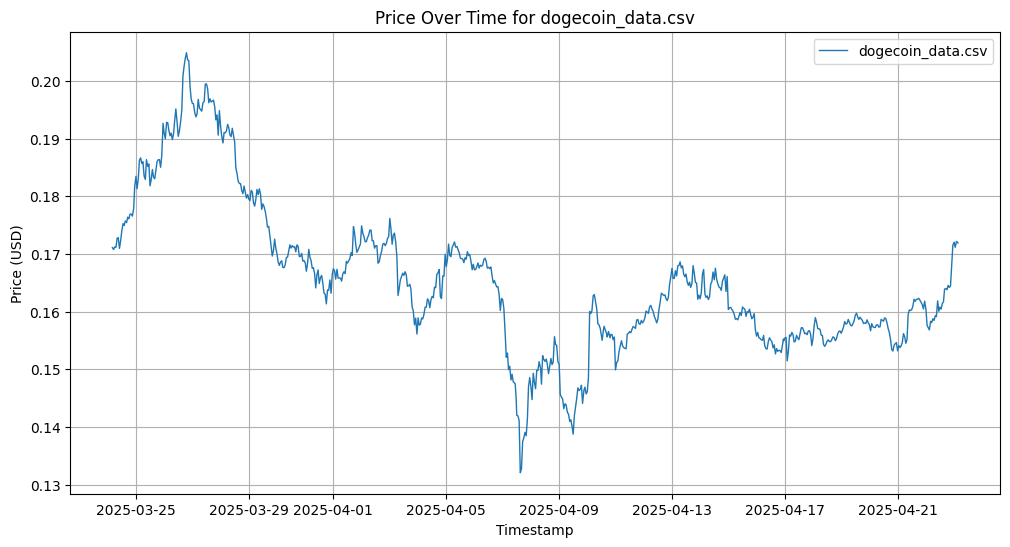

Processing: shiba-inu_data.csv


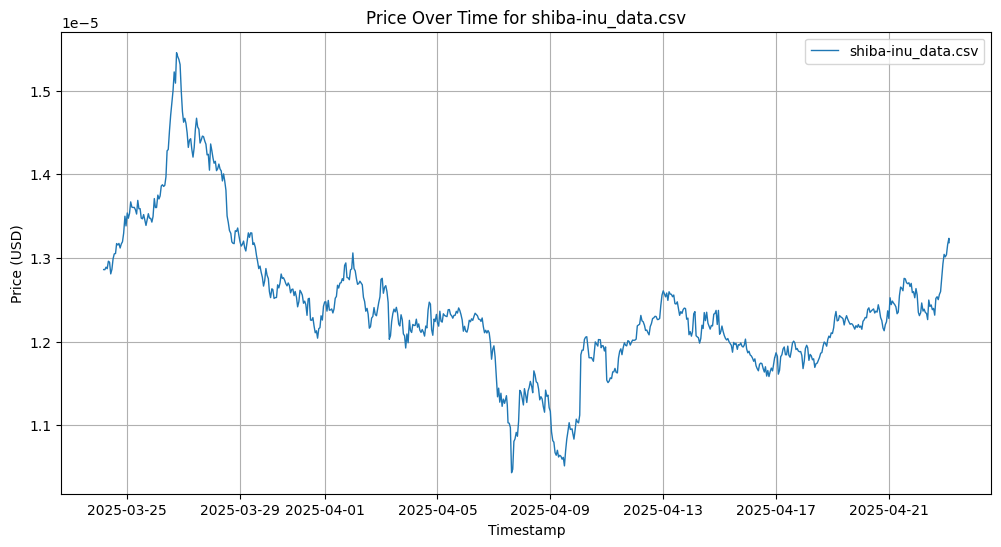

Processing: twitter_data.csv
Error: 'twitter_data.csv' does not contain a 'Timestamp' or 'Timestamp_ms' column. Skipping.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

def plot_price_over_time(csv_file):
    """Reads a CSV file, extracts timestamp and price, and plots the price over time in a separate figure."""
    try:
        df = pd.read_csv(csv_file)
        if 'Timestamp' in df.columns:
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])
            df.set_index('Timestamp', inplace=True)
        elif 'Timestamp_ms' in df.columns:
            df['Timestamp'] = pd.to_datetime(df['Timestamp_ms'] / 1000, unit='s')
            df.set_index('Timestamp', inplace=True)
            df.drop(columns=['Timestamp_ms'], inplace=True, errors='ignore')
        else:
            print(f"Error: '{csv_file}' does not contain a 'Timestamp' or 'Timestamp_ms' column. Skipping.")
            return

        if 'Price_USD' in df.columns:
            plt.figure(figsize=(12, 6))
            plt.plot(df.index, df['Price_USD'], label=csv_file, linewidth=1)
            plt.xlabel('Timestamp')
            plt.ylabel('Price (USD)')
            plt.title(f'Price Over Time for {csv_file}')
            plt.legend()
            plt.grid(True)
            plt.show()  # Show the plot for each file immediately
        else:
            print(f"Error: '{csv_file}' does not contain a 'Price_USD' column. Skipping.")
            return

    except FileNotFoundError:
        print(f"Error: '{csv_file}' not found. Make sure the file is in the correct directory.")
    except Exception as e:
        print(f"An error occurred while reading '{csv_file}': {e}")

if __name__ == "__main__":
    # Specify the pattern to match your CSV files
    csv_pattern = '*.csv'
    csv_files = glob.glob(csv_pattern)

    if not csv_files:
        print(f"No CSV files found matching the pattern '{csv_pattern}' in the current directory.")
    else:
        for file in csv_files:
            print(f"Processing: {file}")
            plot_price_over_time(file)

    # Alternatively, to plot specific files:
    # csv_files = ['dogecoin_data.csv', 'shiba-inu_data.csv']
    # for file in csv_files:
    #     plot_price_over_time(file)

In [ ]:
tets